# Import Dataset Hasil Stemming dan Libraries

In [17]:
!pip install wordcloud


In [4]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [5]:
from PIL import Image

In [6]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix

In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv('mypertamina-stemming.tsv', sep='\t', names=['komentar', 'rating', 'kategori', 'bahasa', 'cleaning', 'token', 'normal', 'stopword', 'stemming'])

df.head(5)

komentar  rating kategori bahasa   
0             . Semoga kedepan.ny semakin berkembang       5  positif     id  \
1        ... aplikasi yg simpel, semoga semakin baik       4  positif     id   
2  1. Lambat 2. Login berulang 3. Tata letak tomb...       1  negatif     id   
3  2kali gagal menggunakan my pertamina untuk mem...       2  negatif     id   
4  4 bintang aja dulu kalau lancar baru diberi 5 ...       4  positif     id   

                                            cleaning   
0                semoga kedepanny semakin berkembang  \
1             aplikasi yg simpel semoga semakin baik   
2  lambat login berulang tata letak tombol kolom ...   
3  kali gagal menggunakan my pertamina untuk memb...   
4  bintang aja dulu kalau lancar baru diberi bintang   

                                               token   
0   ['semoga', 'kedepanny', 'semakin', 'berkembang']  \
1  ['aplikasi', 'yg', 'simpel', 'semoga', 'semaki...   
2  ['lambat', 'login', 'berulang', 'tata', 'letak...   
3  ['kali', 'gagal', 'menggunakan', 'my', 'pertam...   
4  ['bintang', 'aja', 'dulu', 'kalau', 'lancar', ...   

                                              normal   
0  ['semoga', 'kedepannya', 'semakin', 'berkembang']  \
1  ['aplikasi', 'yang', 'simpel', 'semoga', 'sema...   
2  ['lambat', 'login', 'berulang', 'tata', 'letak...   
3  ['kali', 'gagal', 'menggunakan', 'my', 'pertam...   
4  ['bintang', 'saja', 'dulu', 'kalau', 'lancar',...   

                                            stopword   
0             ['semoga', 'kedepannya', 'berkembang']  \
1                   ['aplikasi', 'simpel', 'semoga']   
2  ['lambat', 'login', 'berulang', 'tata', 'letak...   
3  ['kali', 'gagal', 'my', 'pertamina', 'membayar...   
4                   ['bintang', 'lancar', 'bintang']   

                                            stemming  
0                       ['moga', 'depan', 'kembang']  
1                     ['aplikasi', 'simpel', 'moga']  
2  ['lambat', 'login', 'ulang', 'tata', 'letak', ...  
3  ['kali', 'gagal', 'my', 'pertamina', 'bayar', ...  
4                   ['bintang', 'lancar', 'bintang']

# Pembuatan WordCloud

In [47]:
#Mmebuat dataframe baru untuk data negatif dan positif
datan = df[df['kategori']=='negatif']
datap = df[df['kategori']=='positif']

In [45]:
def create_wordcloud(text):
 mask = np.array(Image.open('cloud.png'))
 stopwords = set(STOPWORDS)
 wc = WordCloud(background_color='white',
 mask = mask,
 max_words=3000,
 stopwords=stopwords,
 repeat=True)
 wc.generate(str(text))
 wc.to_file('wc.png')
 print('Word Cloud Saved Successfully')
 path='wc.png'
 display(Image.open(path))

Word Cloud Saved Successfully


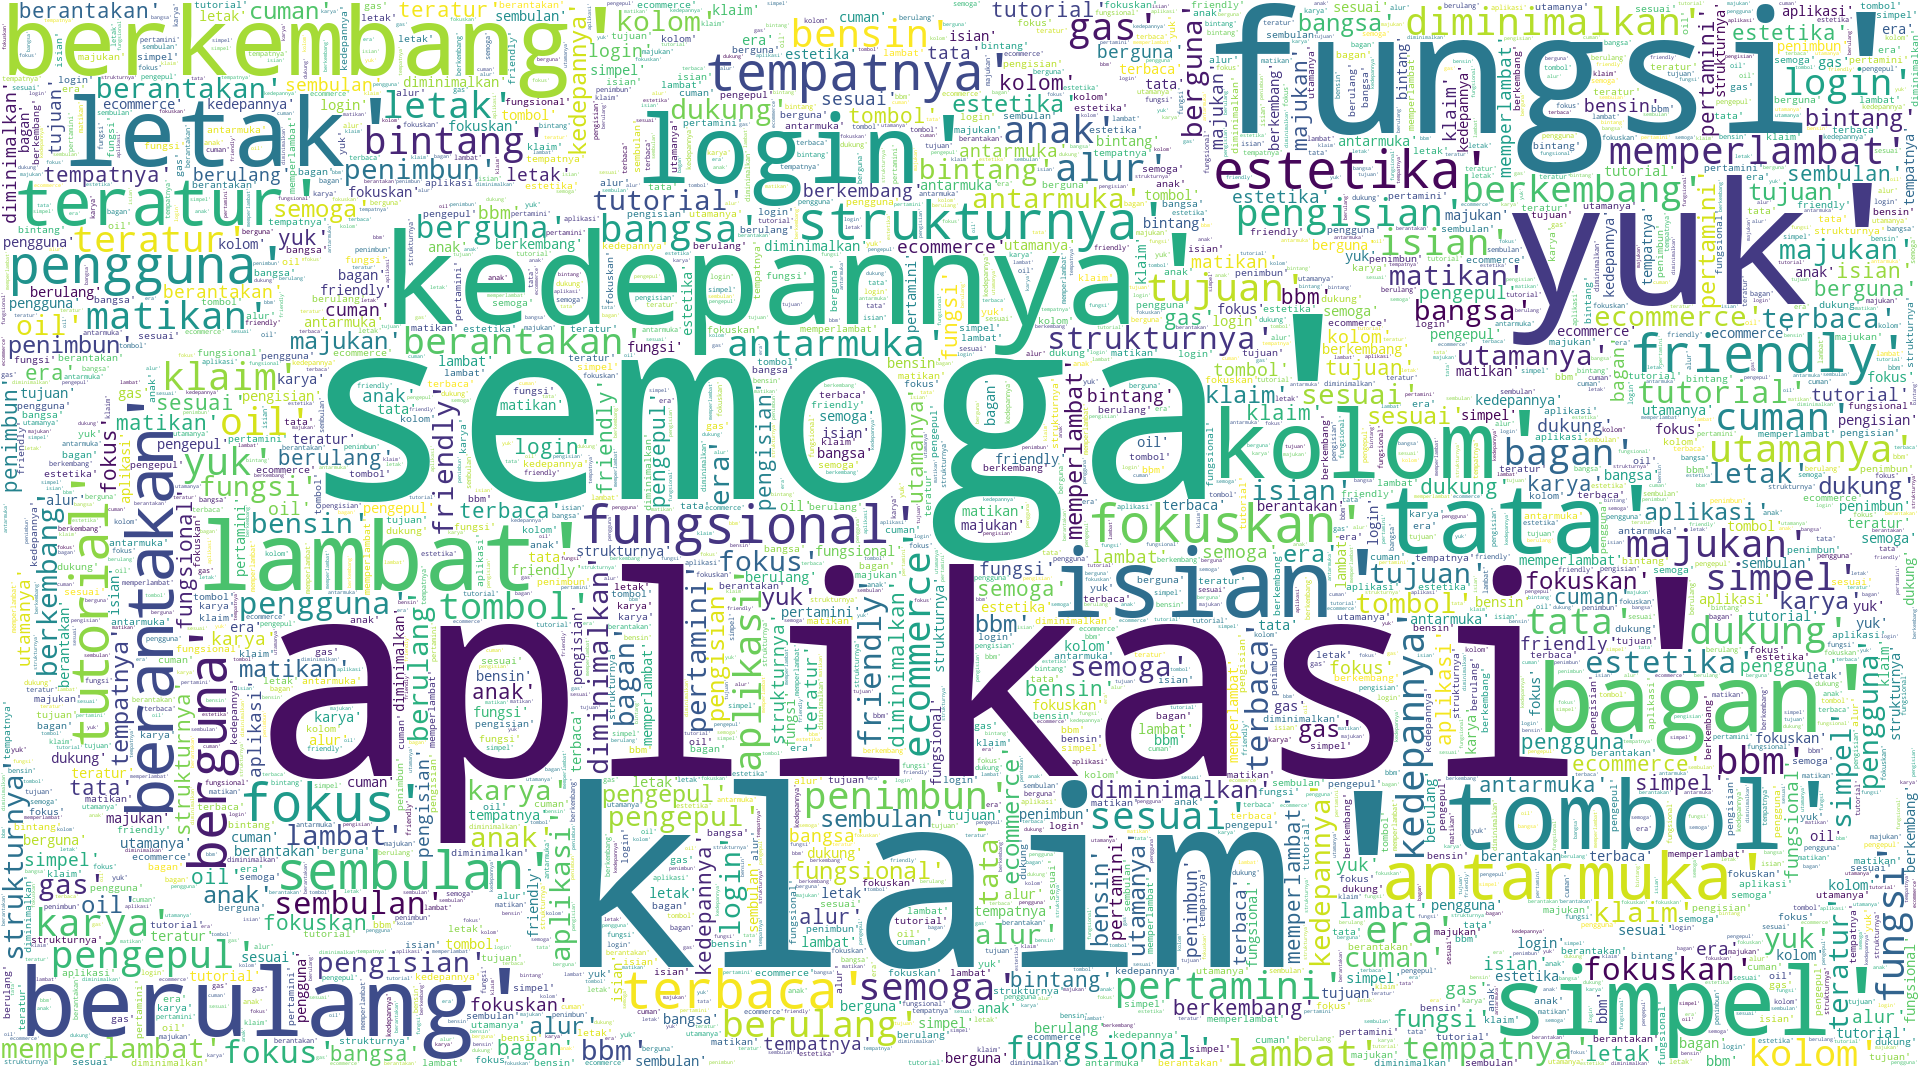

In [49]:
#Membuat Wordcloud untuk keseluruhan data
create_wordcloud(df['stopword'].values)

Word Cloud Saved Successfully


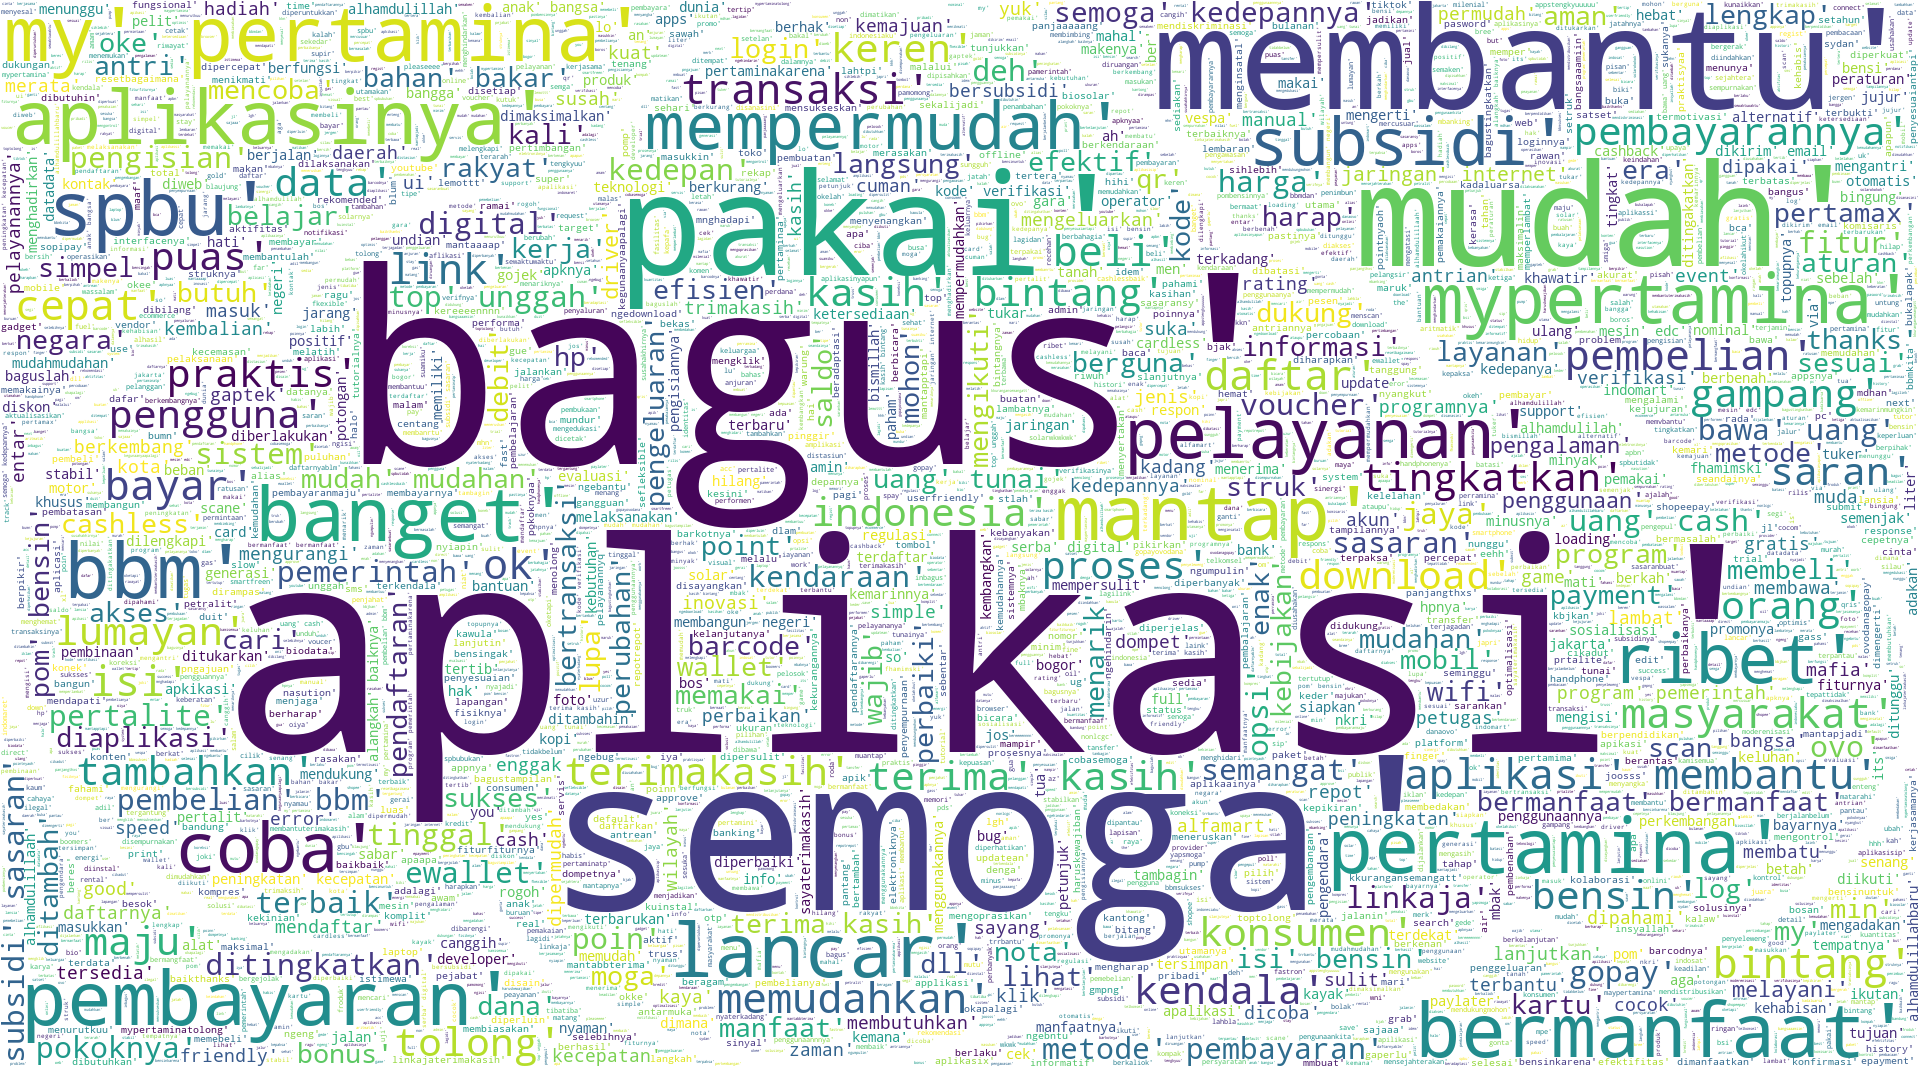

In [50]:
#Wordcloud Positif
create_wordcloud(datap['stopword'].values)

Word Cloud Saved Successfully


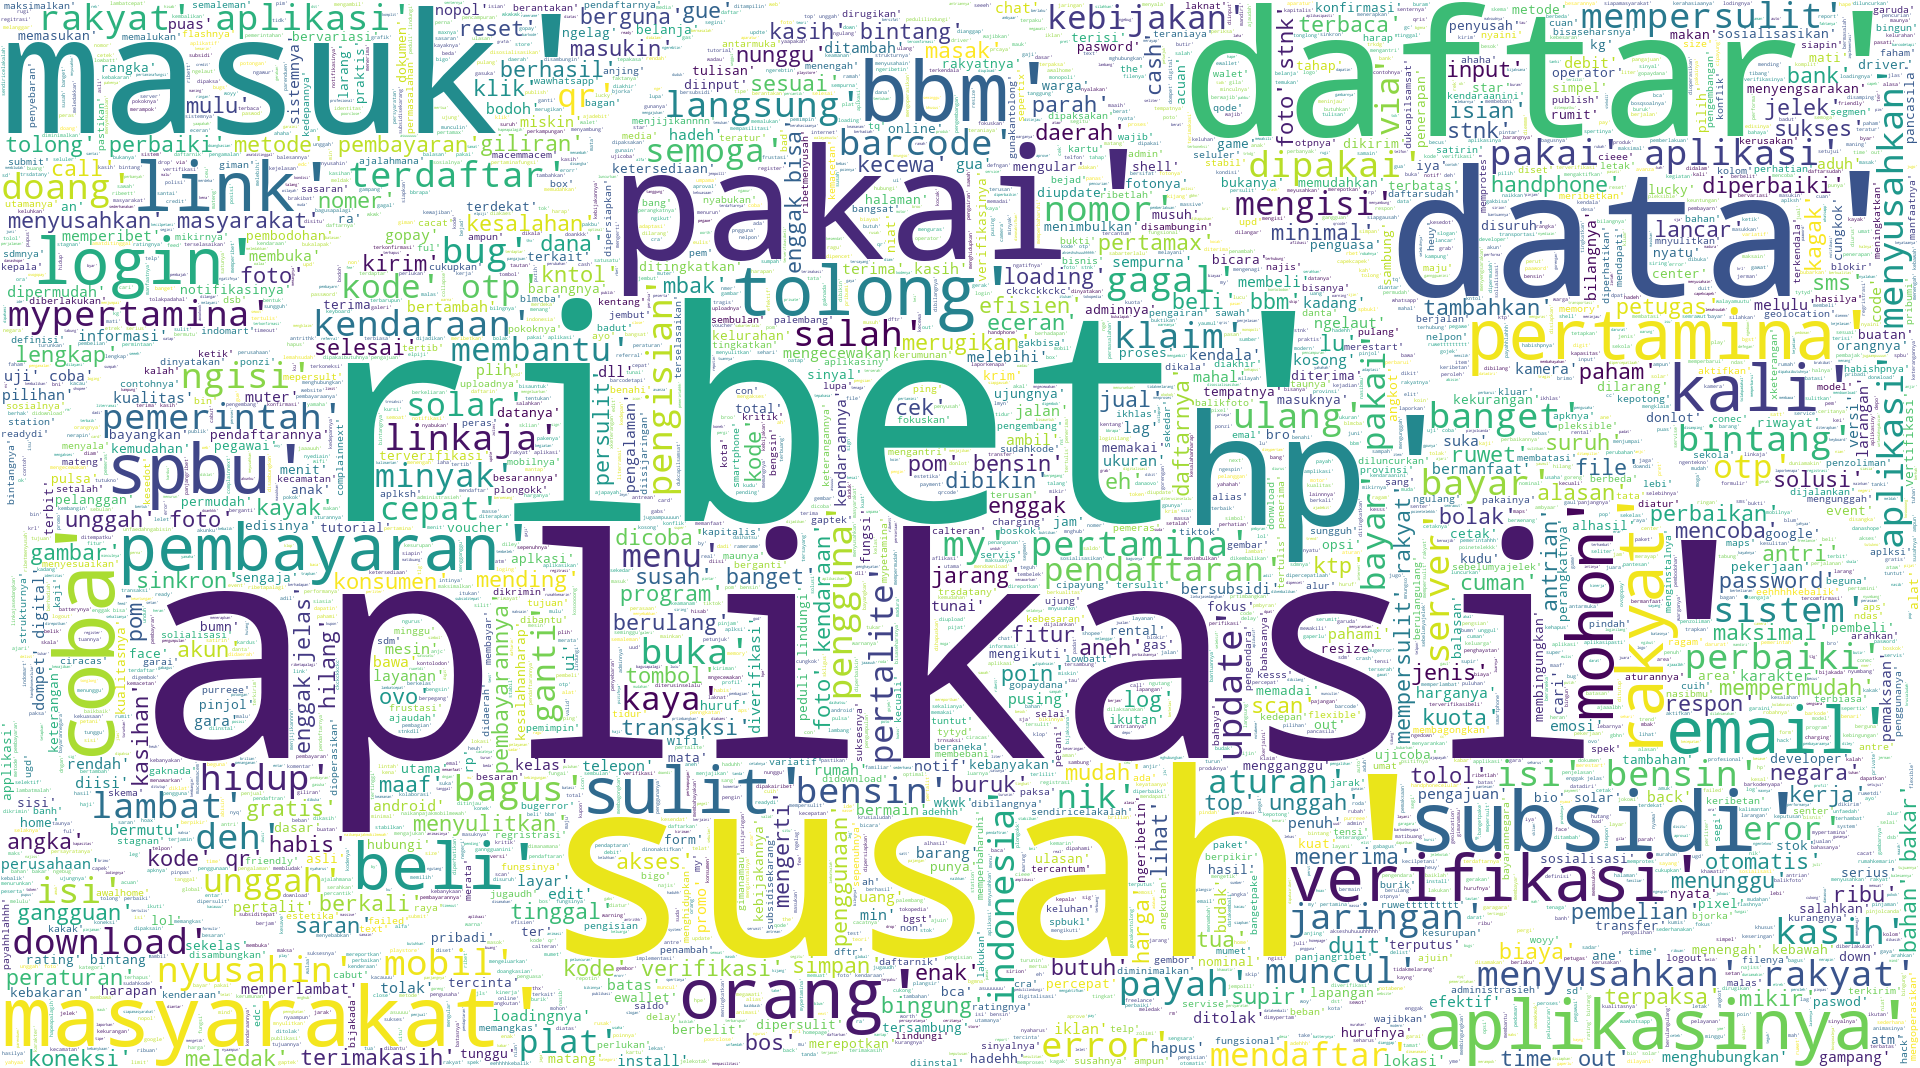

In [51]:
#Wordcloud Negatif
create_wordcloud(datan['stopword'].values)

# Count Vectorizer

In [27]:
#Representasi CountVectorizer
countVectorizer=CountVectorizer()
countVector=countVectorizer.fit_transform(df['stemming'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))

1370 Number of reviews has 1945 words


In [8]:
#Mencari ngram dalam data
def get_top_n_gram(corpus,ngram_range,n=None):
 vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
 bag_of_words = vec.transform(corpus)
 sum_words = bag_of_words.sum(axis=0) 
 words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
 words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
 return words_freq[:n]


In [9]:
#bigram
n2_bigrams = get_top_n_gram(df['cleaning'],(2,2),20)
n2_bigrams

[('aplikasi ini', 50),
 ('sangat membantu', 46),
 ('link aja', 40),
 ('tidak bisa', 37),
 ('tidak ada', 21),
 ('kasih bintang', 21),
 ('gak bisa', 21),
 ('subsidi tepat', 20),
 ('bisa di', 19),
 ('metode pembayaran', 19),
 ('menyusahkan rakyat', 19),
 ('lebih baik', 18),
 ('tepat sasaran', 18),
 ('di spbu', 16),
 ('isi bensin', 16),
 ('pake aplikasi', 15),
 ('aplikasi nya', 15),
 ('apk ini', 14),
 ('terima kasih', 14),
 ('pembelian bbm', 13)]

In [10]:
#trigram
n3_trigrams = get_top_n_gram(df['cleaning'],(3,3),20)
n3_trigrams

[('aplikasi menyusahkan rakyat', 10),
 ('ke link aja', 9),
 ('aplikasi gak jelas', 8),
 ('aplikasi ini sangat', 7),
 ('bawa uang cash', 7),
 ('subsidi tepat sasaran', 7),
 ('sangat membantu sekali', 6),
 ('di pom bensin', 6),
 ('tidak ada kendala', 5),
 ('untuk metode pembayaran', 5),
 ('aplikasi yang sangat', 5),
 ('bikin susah rakyat', 5),
 ('terima kasih pertamina', 5),
 ('dengan adanya aplikasi', 5),
 ('adanya aplikasi ini', 5),
 ('ini sangat membantu', 4),
 ('udah ada peningkatan', 4),
 ('lebih baik lagi', 4),
 ('masih banyak bug', 4),
 ('aplikasi pertamina ini', 4)]

# Pembobotan TF-IDF

In [11]:
tfidf=TfidfTransformer()
clf=CountVectorizer()
X_cv=clf.fit_transform(df['stemming'])
tf_transformer=TfidfTransformer(use_idf=True).fit(X_cv)
X_tf=tf_transformer.transform(X_cv)
print(X_tf)

  (0, 1131)	0.4220293892386618
  (0, 819)	0.6730271038614354
  (0, 422)	0.6073925518861182
  (1, 1634)	0.817477647902484
  (1, 1131)	0.47877902813176565
  (1, 100)	0.32015767584273896
  (2, 1888)	0.14506349524728718
  (2, 1864)	0.12745127447789584
  (2, 1850)	0.15283899962896616
  (2, 1839)	0.1486257484021737
  (2, 1812)	0.1486257484021737
  (2, 1748)	0.14506349524728718
  (2, 1735)	0.17401347355324406
  (2, 1689)	0.17401347355324406
  (2, 1608)	0.13260787722886902
  (2, 1582)	0.17401347355324406
  (2, 1114)	0.14506349524728718
  (2, 977)	0.11564665453138359
  (2, 957)	0.17401347355324406
  (2, 923)	0.2491177830194616
  (2, 866)	0.17401347355324406
  (2, 856)	0.2839554624132693
  (2, 718)	0.18051785876062648
  (2, 633)	0.20211731215940373
  (2, 565)	0.16464361957547843
  :	:
  (1366, 1562)	0.3300440006654213
  (1366, 1243)	0.41976048311727465
  (1366, 718)	0.21772527740925582
  (1366, 404)	0.3971582423129626
  (1366, 198)	0.21140788490340875
  (1366, 179)	0.2016887323487518
  (1366, 10

In [12]:
#Split Data Training 80% Data Testing 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tf, df['kategori'], test_size=0.20, stratify=df['kategori'], random_state=42)
print("X_train_shape", X_train.shape)
print("X_test_shape", X_test.shape)
print("y_train_shape", y_train.shape)
print("y_test_shape", y_test.shape)

X_train_shape (1096, 1945)
X_test_shape (274, 1945)
y_train_shape (1096,)
y_test_shape (274,)


# Naive Bayes Classifier

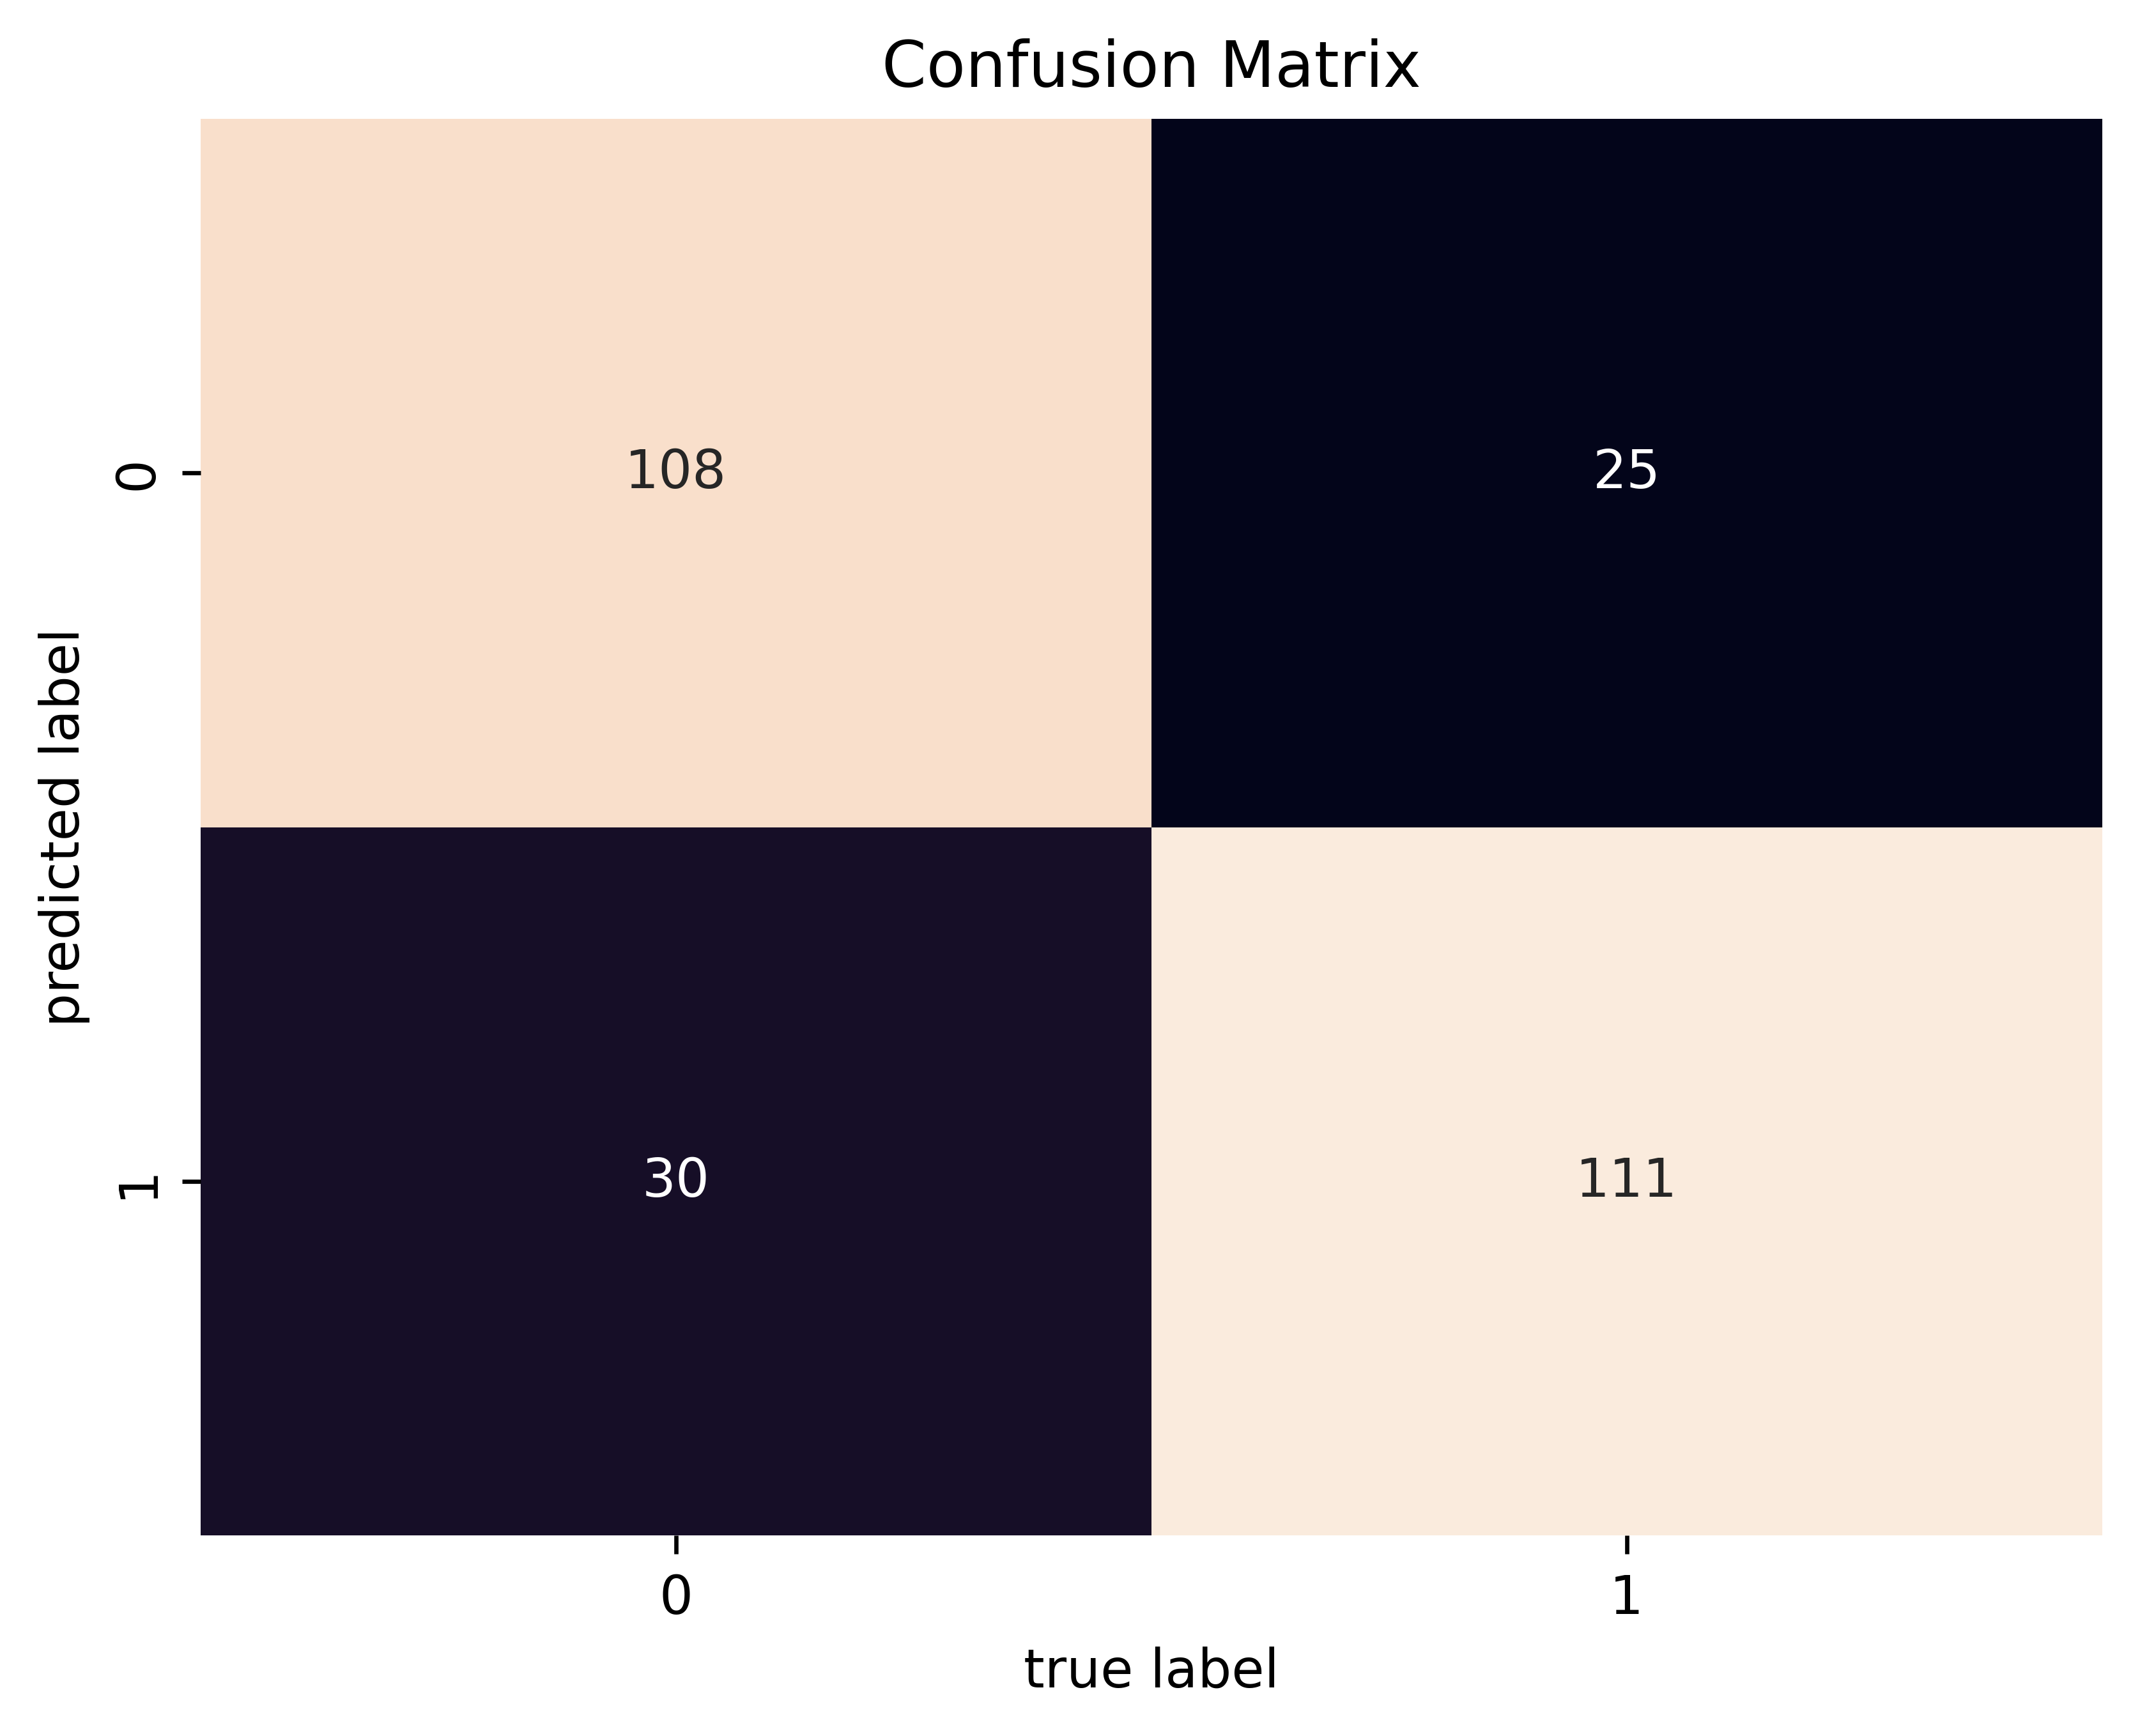

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import seaborn as sns

nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)
nb_pred=nb_clf.predict(X_test)
plt.figure(dpi=600)
mat=confusion_matrix(y_test, nb_pred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("Confusion_matrix.png")
plt.show()

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Nilai akurasi adalah:", accuracy_score(y_test,nb_pred))
print("Nilai presisi adalah:", precision_score(y_test, nb_pred, average="binary", pos_label="negatif"))
print("Nilai recall adalah:", recall_score(y_test, nb_pred, average="binary", pos_label="negatif"))
print("Nilai f1-score adalah:", f1_score(y_test, nb_pred, average="binary", pos_label="negatif"))

print('=====================================================\n')
print(classification_report(y_test, nb_pred, zero_division=0))


Nilai akurasi adalah: 0.7992700729927007
Nilai presisi adalah: 0.8120300751879699
Nilai recall adalah: 0.782608695652174
Nilai f1-score adalah: 0.7970479704797048

              precision    recall  f1-score   support

     negatif       0.81      0.78      0.80       138
     positif       0.79      0.82      0.80       136

    accuracy                           0.80       274
   macro avg       0.80      0.80      0.80       274
weighted avg       0.80      0.80      0.80       274



In [19]:
#Split Data Training 70% Data Testing 30%

X_train, X_test, y_train, y_test = train_test_split(X_tf, df['kategori'], test_size=0.30, stratify=df['kategori'], random_state=42)
print("X_train_shape", X_train.shape)
print("X_test_shape", X_test.shape)
print("y_train_shape", y_train.shape)
print("y_test_shape", y_test.shape)

X_train_shape (959, 1945)
X_test_shape (411, 1945)
y_train_shape (959,)
y_test_shape (411,)


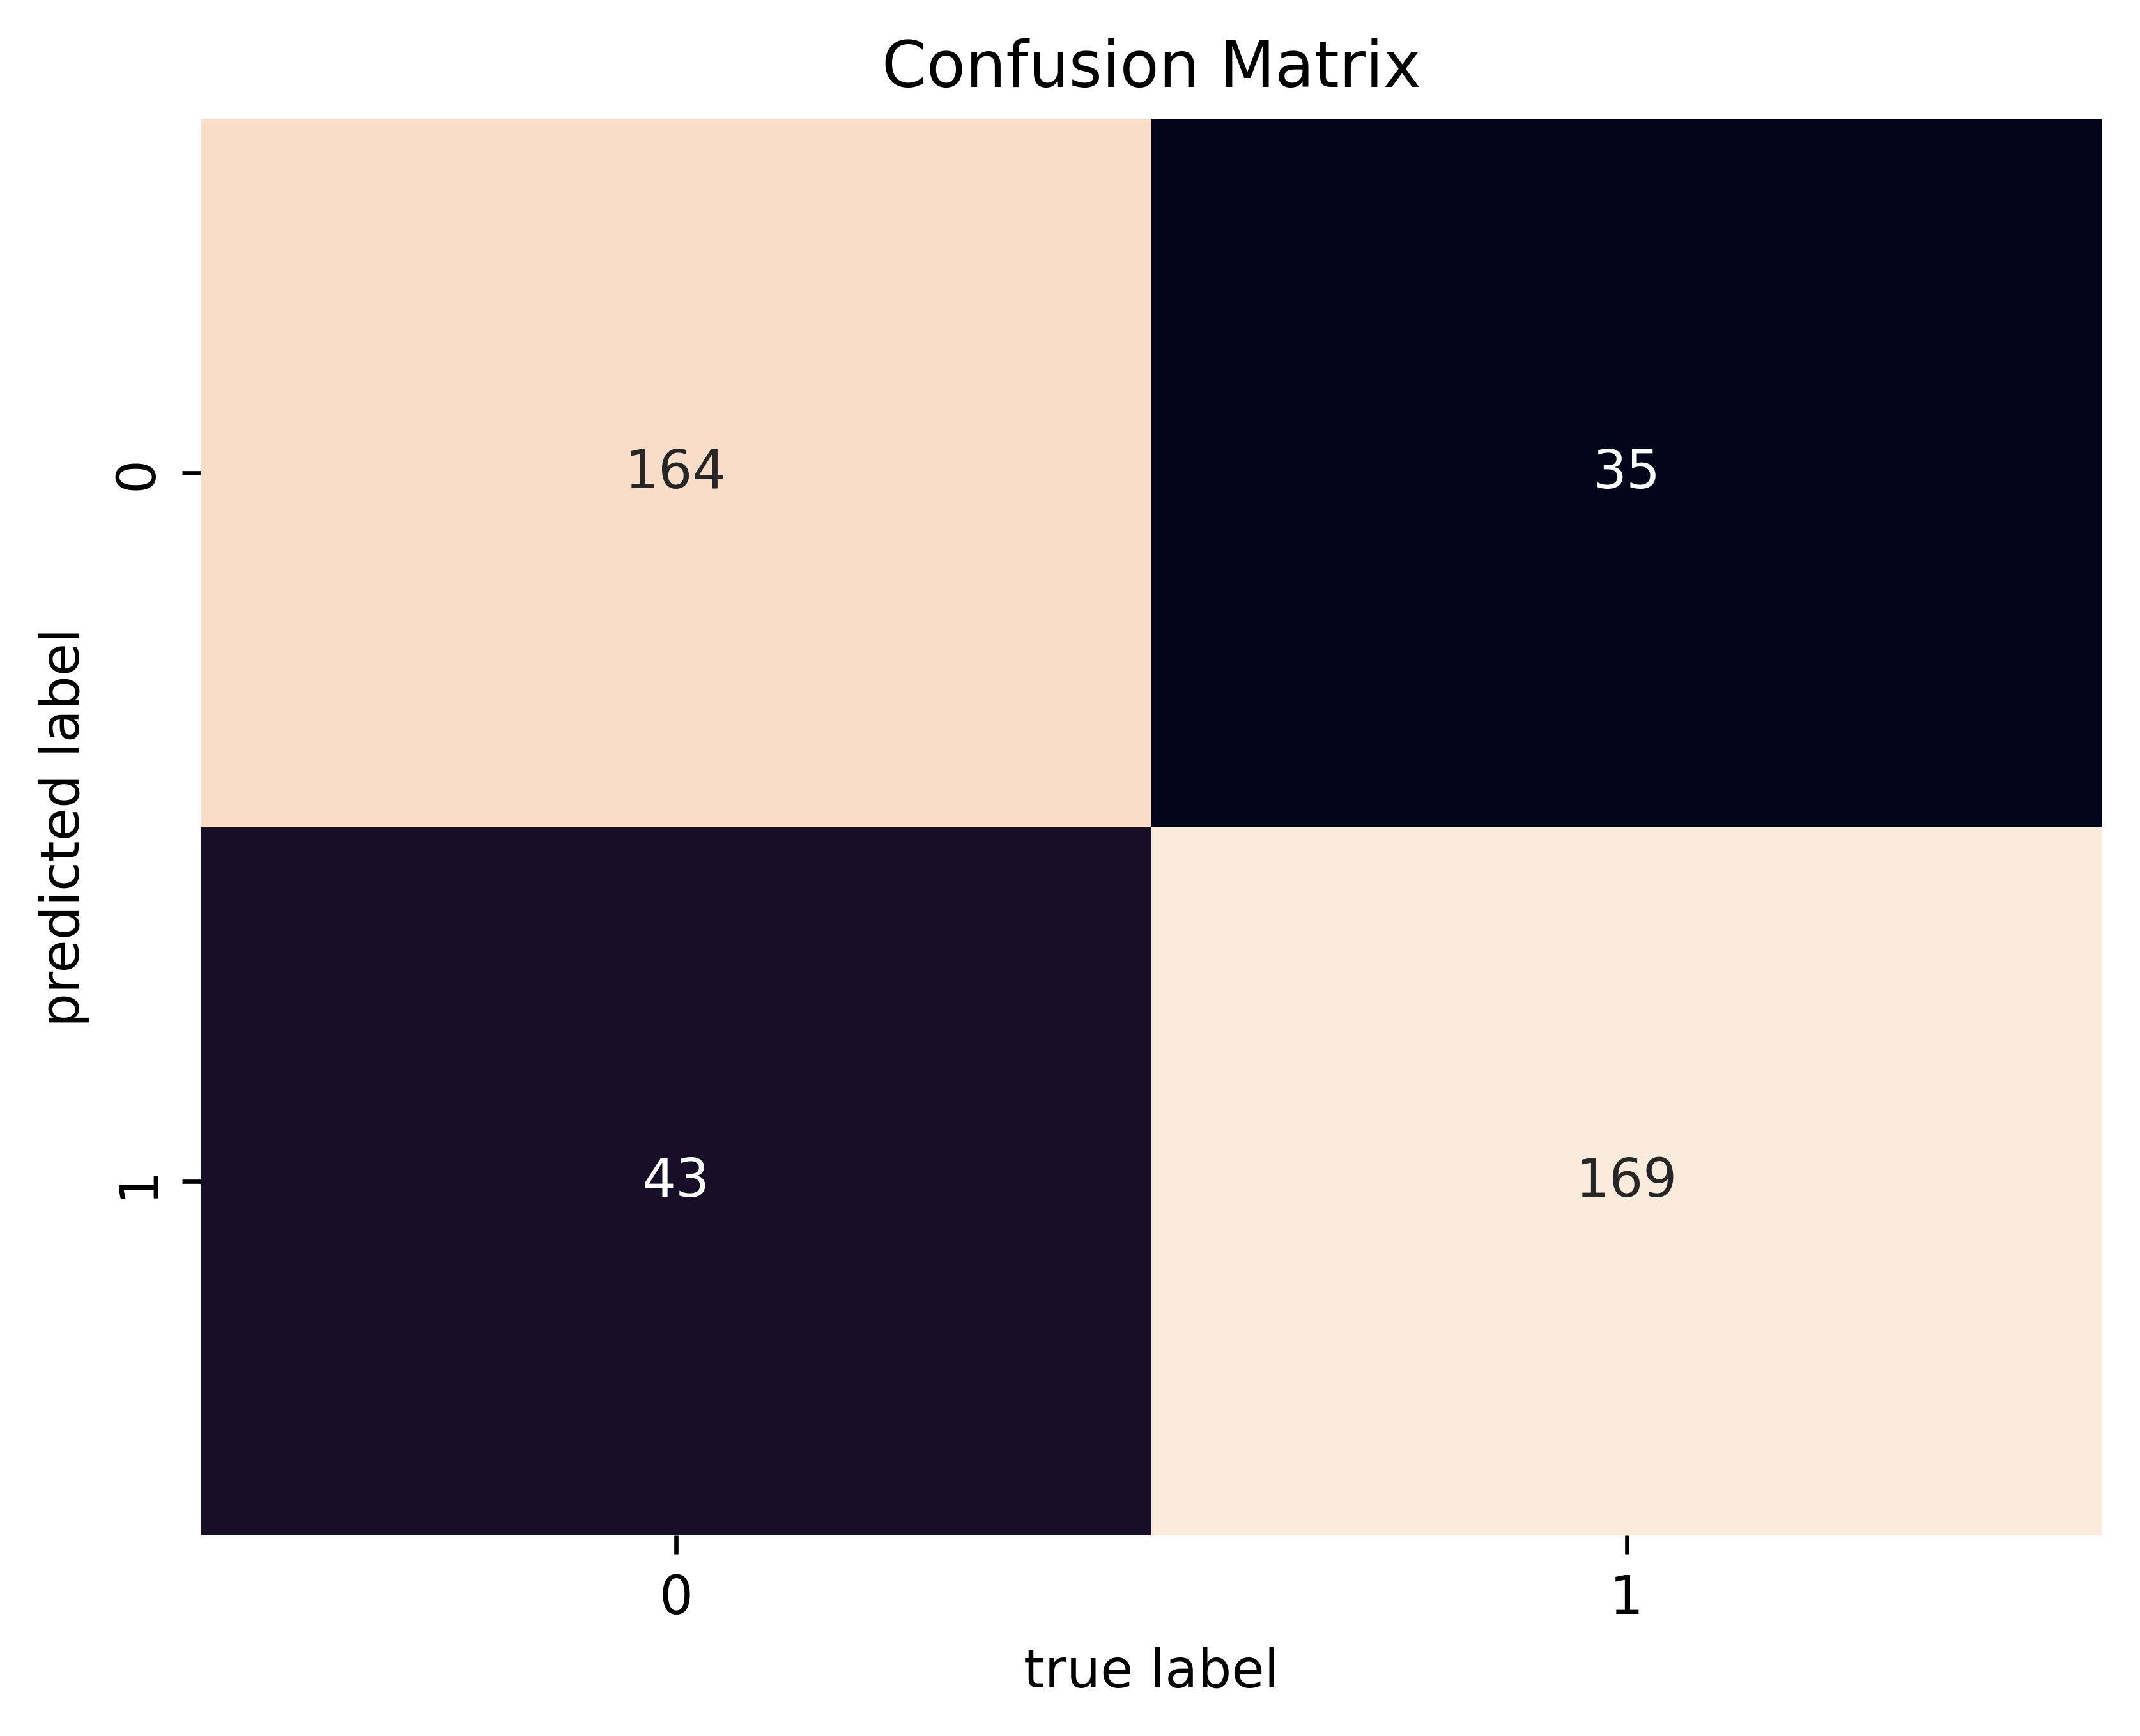

In [20]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)
nb_pred=nb_clf.predict(X_test)
plt.figure(dpi=600)
mat=confusion_matrix(y_test, nb_pred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("Confusion_matrix.png")
plt.show()

In [21]:
print("Nilai akurasi adalah:", accuracy_score(y_test,nb_pred))
print("Nilai presisi adalah:", precision_score(y_test, nb_pred, average="binary", pos_label="negatif"))
print("Nilai recall adalah:", recall_score(y_test, nb_pred, average="binary", pos_label="negatif"))
print("Nilai f1-score adalah:", f1_score(y_test, nb_pred, average="binary", pos_label="negatif"))

print('=====================================================\n')
print(classification_report(y_test, nb_pred, zero_division=0))

Nilai akurasi adalah: 0.8102189781021898
Nilai presisi adalah: 0.8241206030150754
Nilai recall adalah: 0.7922705314009661
Nilai f1-score adalah: 0.8078817733990148

              precision    recall  f1-score   support

     negatif       0.82      0.79      0.81       207
     positif       0.80      0.83      0.81       204

    accuracy                           0.81       411
   macro avg       0.81      0.81      0.81       411
weighted avg       0.81      0.81      0.81       411

